# 앙상블 모형 (Random Forest)

- Voting 과 Bagging 분류모형 비교
  - Voting: 동일한 훈련 데이터, 다른 알고리즘
  - Bagging: 다른 훈련 데이터, 한가지 알고리즘

## 환경설정

In [8]:
import pandas as pd
import numpy as np

from sklearn import preprocessing # 전처리

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score

from sklearn.ensemble import RandomForestClassifier

## 데이터셋

In [11]:
cancer_df = pd.read_csv('data/breast_cancer.csv')

# list(cancer_df.columns)
y = cancer_df[['diagnosis']]
X = cancer_df.loc[:, 'radius_mean':'fractal_dimension_worst']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)
y_train = np.ravel(y_train, order='C') # KNN : A column-vector y was passed when a 1d array was expected

## 기계학습 - CV


In [12]:
clf_rf = RandomForestClassifier(n_estimators = 500, max_depth = 4, max_features = 3, bootstrap = True, random_state=777)

clf_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, max_features=3, n_estimators=500,
                       random_state=777)

## 예측 성능

In [19]:
y_pred = clf_rf.predict(X_test)

print('Random Forest Classifier: {:.3f}'.format(f1_score(y_test, y_pred, pos_label="M")))

Random Forest Classifier: 0.925


## 변수 중요도

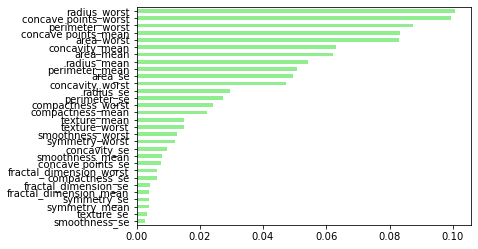

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

feat_imp = pd.Series(clf_rf.feature_importances_, index = X.columns)
feat_imp_sorted = feat_imp.sort_values()

feat_imp_sorted.plot(kind='barh', color='lightgreen')
plt.show()